#Create Your Own Google Stock Prediction Program Using Python And Machine Learning
#https://www.youtube.com/watch?v=KYc0EFN-VnM&t=170s

In [14]:
#Description: This program predicts the price of Google stock for a specific day
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [15]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG (1).csv


In [16]:
#Store and look at the data
df = pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-27,621.000000,634.299988,620.500000,627.260010,627.260010,2675400
1,2015-07-28,632.830017,632.830017,623.309998,628.000000,628.000000,1727300
2,2015-07-29,628.799988,633.359985,622.650024,631.929993,631.929993,1575100
3,2015-07-30,630.000000,635.219971,622.049988,632.590027,632.590027,1474200
4,2015-07-31,631.380005,632.909973,625.500000,625.609985,625.609985,1706100
...,...,...,...,...,...,...,...
1254,2020-07-20,1515.260010,1570.290039,1503.599976,1565.719971,1565.719971,1557300
1255,2020-07-21,1586.989990,1586.989990,1554.280029,1558.420044,1558.420044,1218600
1256,2020-07-22,1560.500000,1570.000000,1546.099976,1568.489990,1568.489990,932000
1257,2020-07-23,1566.969971,1571.869995,1507.391968,1515.680054,1515.680054,1627600


In [17]:
#Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2020-07-24,1498.930054,1517.635986,1488.400024,1511.869995,1511.869995,1544000


In [18]:
#Prepare the data for training
df = df.head(len(df)-5)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-27,621.000000,634.299988,620.500000,627.260010,627.260010,2675400
1,2015-07-28,632.830017,632.830017,623.309998,628.000000,628.000000,1727300
2,2015-07-29,628.799988,633.359985,622.650024,631.929993,631.929993,1575100
3,2015-07-30,630.000000,635.219971,622.049988,632.590027,632.590027,1474200
4,2015-07-31,631.380005,632.909973,625.500000,625.609985,625.609985,1706100
...,...,...,...,...,...,...,...
1249,2020-07-13,1550.000000,1577.131958,1505.243042,1511.339966,1511.339966,1846400
1250,2020-07-14,1490.310059,1522.949951,1483.500000,1520.579956,1520.579956,1585000
1251,2020-07-15,1523.130005,1535.329956,1498.000000,1513.640015,1513.640015,1610700
1252,2020-07-16,1500.000000,1518.689941,1486.310059,1518.000000,1518.000000,1519300


In [19]:
#Create an empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [20]:
#Get the date and the adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [21]:
#Create the independent data set
for day in df_days:
  days.append( [int(day.split('-')[1])] )

In [22]:
#Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append( float(adj_close_price))

In [23]:
# Create the 3 Support vector Regression Models

#Create and Train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and Train a SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

#Create and Train a SVR model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

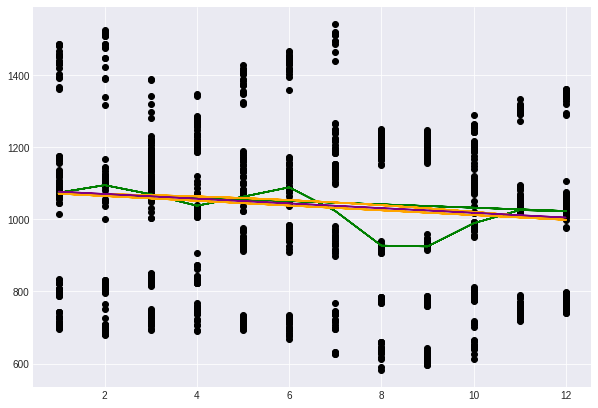

In [24]:
#plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(10,7))
plt.scatter(days, adj_close_prices, color='black', label = 'Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label= 'RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label= 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label= 'Linear Model')

In [25]:
#show the pedicted price for the given day
day =[[255]]

print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [1026.54806821]
The Linear SVR predicted: [-585.49543058]
The Polynomial SVR predicted: [-31957.70724029]


In [ ]:
vff